In [5]:
Definindo uma função de limiarização

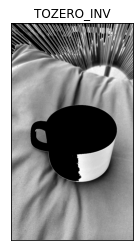

In [46]:
img = cv2.imread('/home/gabriel/Documentos/EP CV/21_gray.jpg',0)

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

plt.imshow(images[i],'gray')
plt.title(titles[i])
plt.xticks([]),plt.yticks([])

plt.show()

In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import glob
import uuid
from skimage import data
from skimage.io import imread, imshow, imsave
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb, rgb2gray

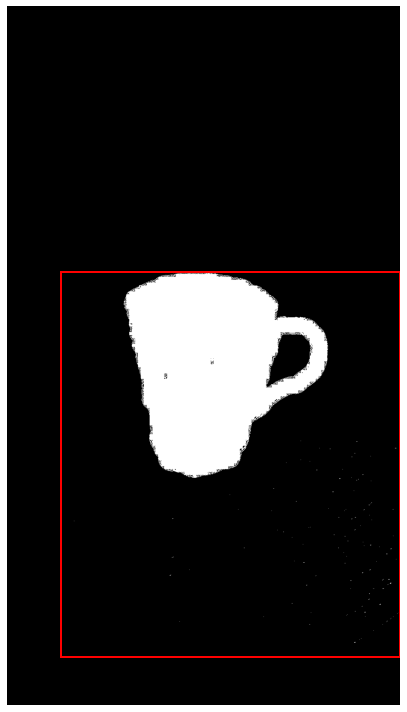

In [14]:
img = cv2.imread('/home/gabriel/Documentos/EP CV/0_gray.jpg',0)

ret,thresh1 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

fig, ax = plt.subplots(figsize=(15, 10))
plt.imshow(thresh1, 'gray')

for region in regionprops(thresh1):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

roi = img[minr:maxr, minc:maxc]
cv2.imwrite('/home/gabriel/Documentos/EP CV/roi.jpg', roi)

ax.set_axis_off()
plt.tight_layout()
plt.savefig('/home/gabriel/Documentos/EP CV/teste.jpg', bbox_inches='tight',pad_inches=0, )
#plt.show()

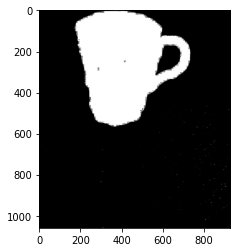

In [15]:
plt.imshow(roi,'gray')

In [ ]:
#####################################################################

In [2]:
classes = ["1 - X_CHA/", "2- M_TIGELA/", "3 - X_CAFE/", "4 - FACA/", "5 - GARFO/", "6 - COLHER/", "7 - GARRAFA/", "8 - TAÇA/", "9 - TIGELA/", "10 - PRATO/"]
pathfile = "/home/gabriel/Documentos/EP CV/3 - manual/4 - imagem binaria limiarização/"
proc = "/home/gabriel/Documentos/EP CV/4 - auto/"

In [3]:
images = glob.glob("/home/gabriel/Documentos/EP CV/4 - auto/4 - imagem binaria limiarização/**/*.jpg")

In [6]:
images[0:5]

['/home/gabriel/Documentos/EP CV/4 - auto/4 - imagem binaria limiarização/3 - X_CAFE/lim73.jpg',
 '/home/gabriel/Documentos/EP CV/4 - auto/4 - imagem binaria limiarização/3 - X_CAFE/lim37.jpg',
 '/home/gabriel/Documentos/EP CV/4 - auto/4 - imagem binaria limiarização/3 - X_CAFE/lim22.jpg',
 '/home/gabriel/Documentos/EP CV/4 - auto/4 - imagem binaria limiarização/3 - X_CAFE/lim41.jpg',
 '/home/gabriel/Documentos/EP CV/4 - auto/4 - imagem binaria limiarização/3 - X_CAFE/lim3.jpg']

In [ ]:
for i in range(0, len(images)):
    img = cv2.imread(images[i],0)

    ret,thresh1 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    fig, ax = plt.subplots(figsize=(15, 10))
    plt.imshow(thresh1, 'gray')

    for region in regionprops(thresh1):
        # take regions with large enough areas
        if region.area >= 100:
            # draw rectangle around segmented
            minr, minc, maxr, maxc = region.bbox
            rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                      fill=False, edgecolor='red', linewidth=2)
            ax.add_patch(rect)

    roi = img[minr:maxr, minc:maxc]
    cv2.imwrite(os.path.join(proc, 'roi'+str(i)+'.jpg'), roi)

    ax.set_axis_off()
    plt.tight_layout()
    plt.savefig(os.path.join(proc, str(i)+'.jpg'), bbox_inches='tight',pad_inches=0)
    #plt.show()